In [13]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

In [4]:
inputs = layers.Input(shape=(600, 600, 3))
model = EfficientNetB7(include_top=False, input_tensor=inputs, weights='imagenet')
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", 'AUC', 'Precision', 'Recall']
)

model.load_weights('../method-3/fracatlas/efficientnetb7_weights.h5')

In [20]:
def classify_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(600, 600))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Use the model to classify the image
    pred = model.predict(x)
    pred_binary = (pred > 0.5).astype(int)
    if pred_binary[0][0] == 0:
        print('Image is classified as a fracture')
    else:
        print('Image is classified as a non-fracture')
    plt.imshow(x[0]/255.)

1/1 [==============================] - 0s 245ms/step
Image is classified as a fracture


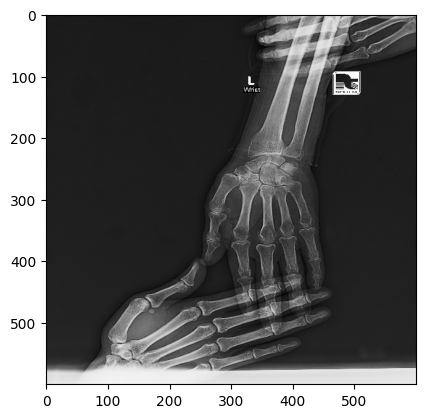

In [21]:
classify_image('../data/FracAtlas/images/Fractured/IMG0000019.jpg')

1/1 [==============================] - 0s 322ms/step
Image is classified as a fracture


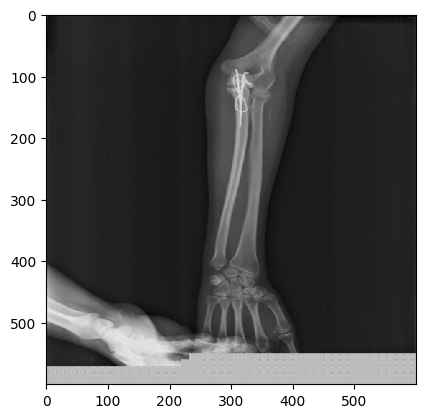

In [23]:
classify_image('../data/FracAtlas/images/Fractured/IMG0004232.jpg')

1/1 [==============================] - 0s 330ms/step
Image is classified as a non-fracture


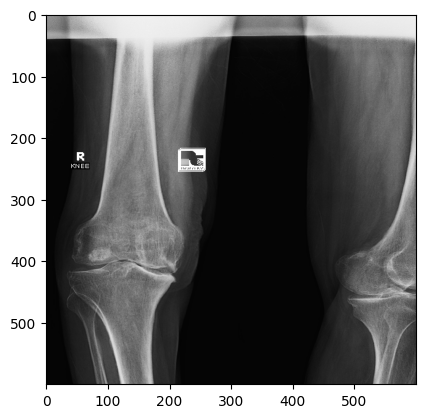

In [27]:
classify_image('../data/FracAtlas/images/Non_fractured/IMG0000021.jpg')

1/1 [==============================] - 0s 299ms/step
Image is classified as a fracture


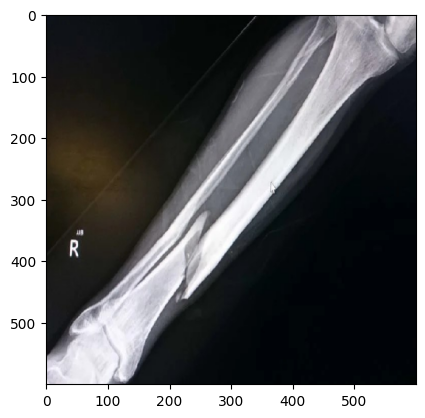

In [28]:
classify_image('../data/321642_2200-732x549.jpg')

1/1 [==============================] - 0s 233ms/step
Image is classified as a fracture


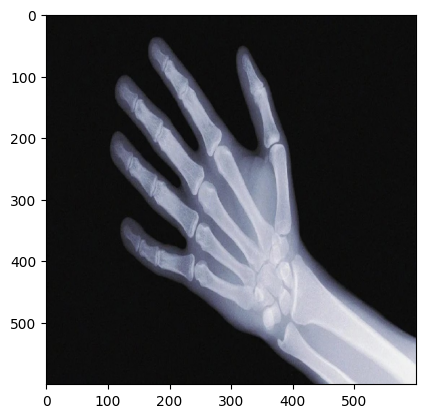

In [29]:
classify_image('../data/bone_density_GettyImages1227502677_Header-1024x575.jpg')

1/1 [==============================] - 0s 322ms/step
Image is classified as a non-fracture


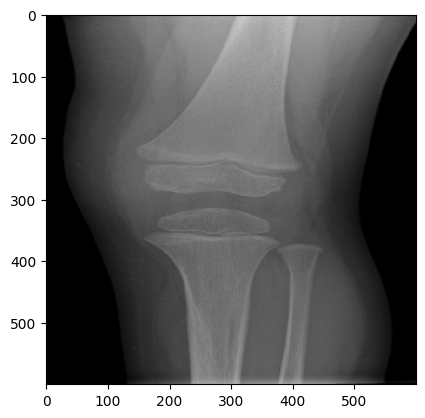

In [30]:
classify_image('../data/unnamed.png')